In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

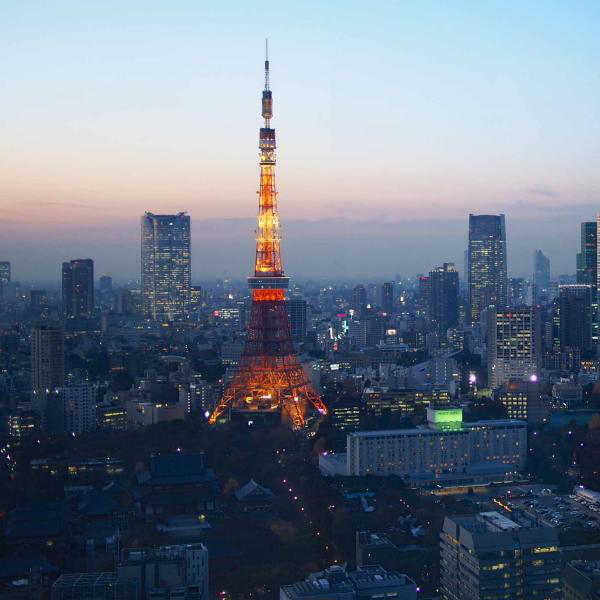

In [2]:
path_img = './assets/img/5c7a814eabba882a6f3f41abbfecb2d0.jpg'
图片 = Image.open(path_img)
图片 = Image.fromarray(np.array(图片)[:600, :600])
图片

In [3]:
矩阵 = np.array(图片).astype(np.float32)
print(矩阵.shape, 矩阵.dtype)

(600, 600, 3) float32


In [4]:
固有值, 固有向量 = np.linalg.eig(矩阵[:,:,0])

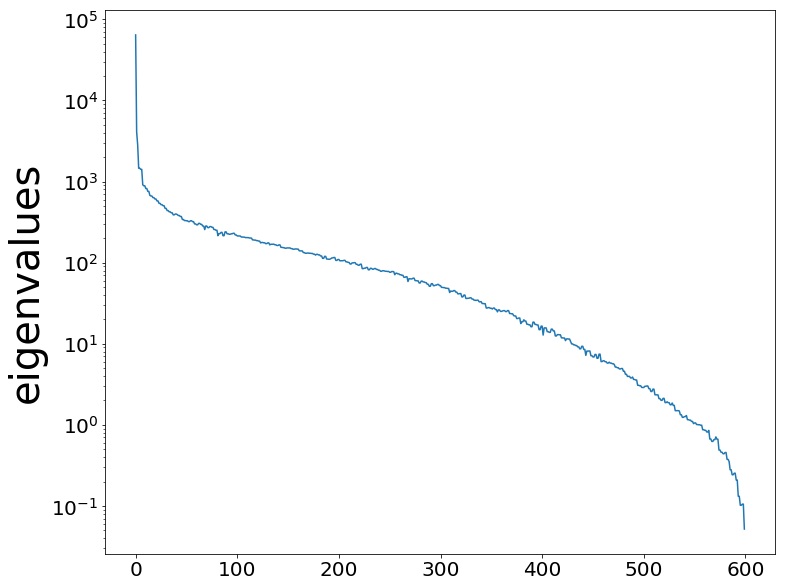

In [5]:
固有值绝对值 = np.absolute(固有值)
fig, ax = plt.subplots(1, 1, figsize=(12,10))
plt.plot(固有值绝对值)
plt.yscale('log')
ax.set_ylabel("eigenvalues")
ax.yaxis.label.set_size(40)
ax.tick_params(labelsize=20)

In [8]:
def 选取矩阵部分固有值进行压缩(矩阵, 固有值个数):
    # 固有值分解
    固有值, 固有向量 = np.linalg.eig(矩阵)

    # 选取前 N 个信息量最大的固有值
    部分的固有值 = 固有值[0:固有值个数]
    部分的固有向量 = 固有向量[:,0:固有值个数]
    部分的固有向量的转置 = np.linalg.inv(固有向量)[0:固有值个数, :]

    # 从选取的部分固有值复原矩阵
    Lambda = np.diag(部分的固有值)
    复原矩阵 = 部分的固有向量 @ Lambda @ 部分的固有向量的转置
    复原矩阵 = 复原矩阵.real

    # 数值调整到 [0,255]之间
    复原矩阵 = (复原矩阵 - 复原矩阵.min()) / (复原矩阵.max() - 复原矩阵.min()) * 255
    复原矩阵 = np.clip(复原矩阵,0,255).astype(np.uint8)
    return 复原矩阵

固有值总数量: 600; 只使用其中的 10 个进行重建


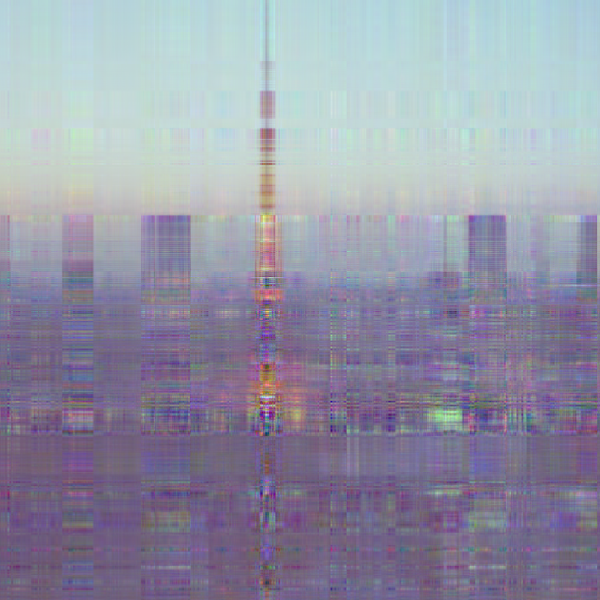


固有值总数量: 600; 只使用其中的 50 个进行重建


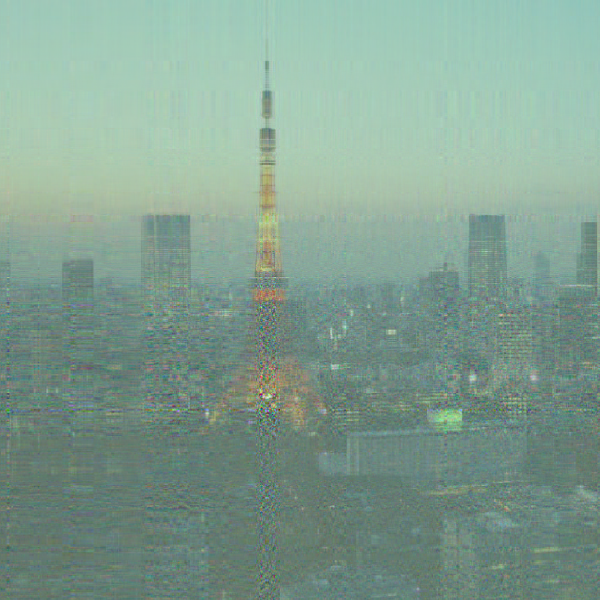


固有值总数量: 600; 只使用其中的 100 个进行重建


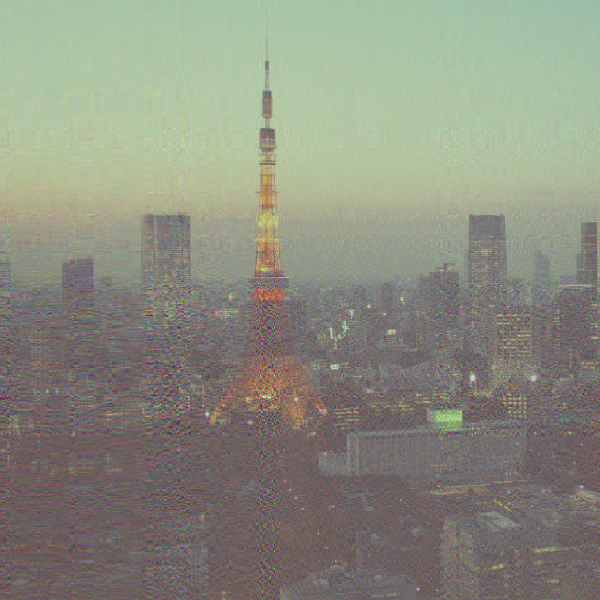


固有值总数量: 600; 只使用其中的 200 个进行重建


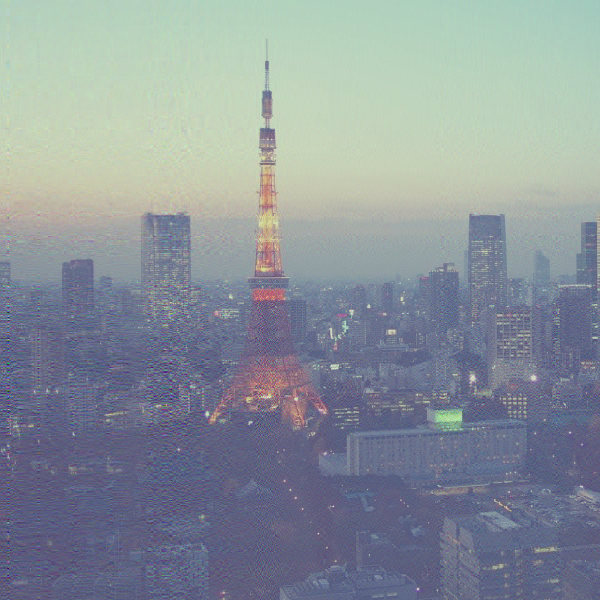


固有值总数量: 600; 只使用其中的 400 个进行重建


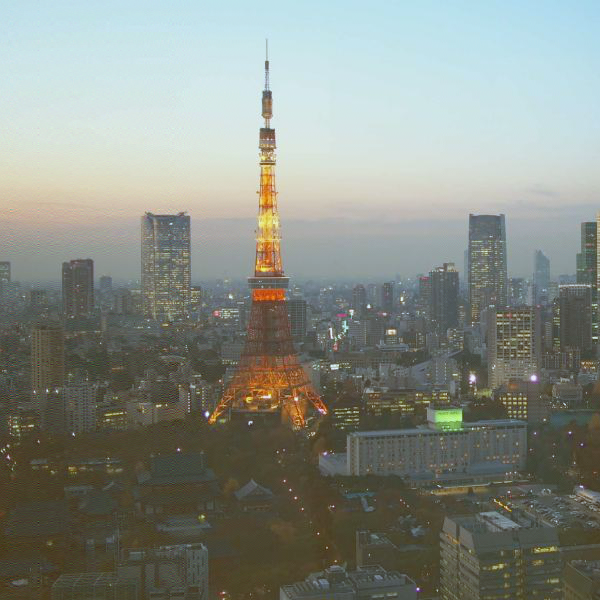


原图像


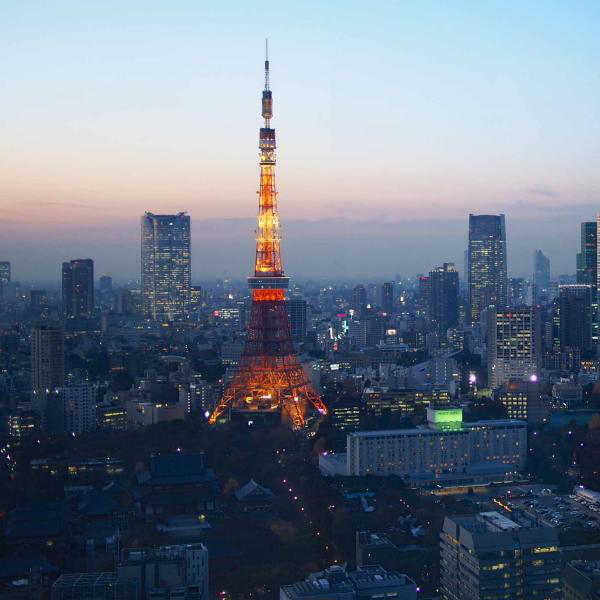

In [9]:
for 选取固有值的个数 in [10, 50, 100, 200, 400]:

    print(f"固有值总数量: {len(矩阵)}; 只使用其中的 {选取固有值的个数} 个进行重建")
    if 矩阵.ndim == 3 and 矩阵.shape[2] == 3:
        压缩矩阵 = [选取矩阵部分固有值进行压缩(矩阵[:,:,i], 选取固有值的个数) for i in range(3)]
        压缩矩阵 = np.stack(压缩矩阵, axis=-1)
    else:
        压缩矩阵 = 选取矩阵部分固有值进行压缩(矩阵, 选取固有值的个数)
    重建图像 = Image.fromarray(压缩矩阵)
    display(重建图像)
    print()

print("原图像")
display(Image.fromarray(矩阵.astype(np.uint8)))